In [1]:
library(GLMsData)
library(statmod)
library(MASS)

Warning message:
"package 'statmod' was built under R version 3.6.3"

In [2]:
data(cervical)

In [3]:
str(cervical)

'data.frame':	16 obs. of  4 variables:
 $ Country: Factor w/ 4 levels "Belgium","EngWales",..: 2 2 2 2 1 1 1 1 3 3 ...
 $ Age    : Factor w/ 4 levels "25to34","35to44",..: 1 2 3 4 1 2 3 4 1 2 ...
 $ Deaths : int  192 860 2762 3035 8 81 242 268 96 477 ...
 $ Wyears : int  153999 14268 15450 15142 2328 2557 2268 2253 15324 16186 ...


In [4]:
cervical

Country,Age,Deaths,Wyears
EngWales,25to34,192,153999
EngWales,35to44,860,14268
EngWales,45to54,2762,15450
EngWales,55to64,3035,15142
Belgium,25to34,8,2328
Belgium,35to44,81,2557
Belgium,45to54,242,2268
Belgium,55to64,268,2253
France,25to34,96,15324
France,35to44,477,16186


In [5]:
cervical$AgeNum <- rep( c(25, 35, 45, 55), 4)

In [6]:
cervical

Country,Age,Deaths,Wyears,AgeNum
EngWales,25to34,192,153999,25
EngWales,35to44,860,14268,35
EngWales,45to54,2762,15450,45
EngWales,55to64,3035,15142,55
Belgium,25to34,8,2328,25
Belgium,35to44,81,2557,35
Belgium,45to54,242,2268,45
Belgium,55to64,268,2253,55
France,25to34,96,15324,25
France,35to44,477,16186,35


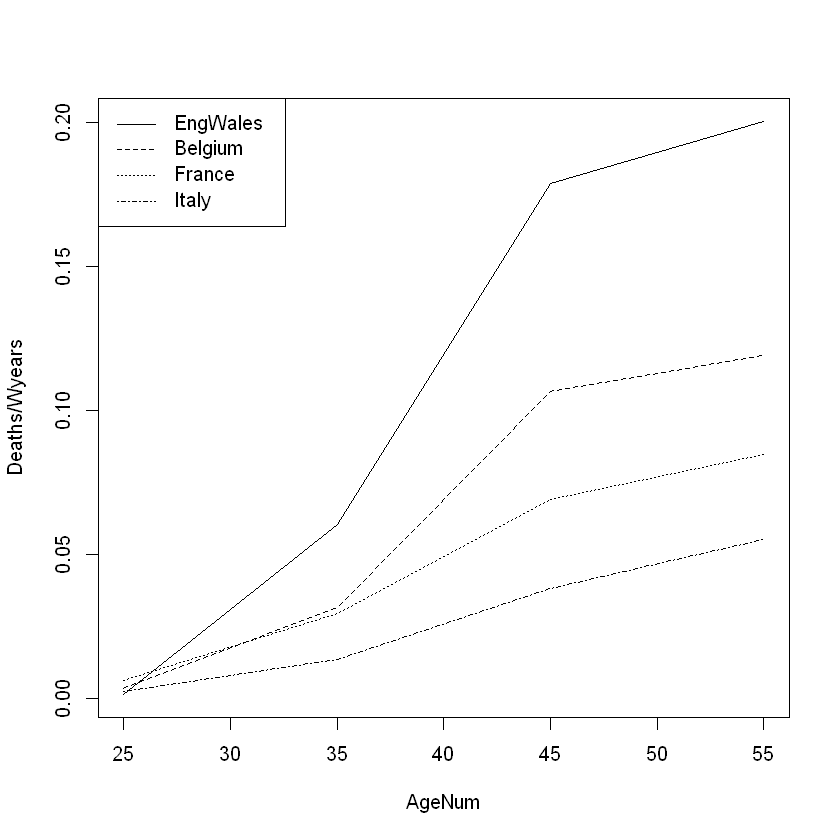

In [7]:
with( cervical, {
plot( Deaths/Wyears ~ AgeNum, type="n")
lines(Deaths/Wyears ~ AgeNum, lty=1,
subset=(Country==unique(Country)[1]) )
lines(Deaths/Wyears ~ AgeNum, lty=2,
subset=(Country==unique(Country)[2]) )
lines(Deaths/Wyears ~ AgeNum, lty=3,
subset=(Country==unique(Country)[3]) )
lines(Deaths/Wyears ~ AgeNum, lty=4,
subset=(Country==unique(Country)[4]) )
legend("topleft", lty=1:4, legend=unique(cervical$Country) )
})

In [8]:
c.m0 <- glm( Deaths ~ offset(log(Wyears)) + Age + Country,
data=cervical, family=poisson )

In [9]:
coef(summary(c.m0))

,Estimate,Std. Error,z value,Pr(>|z|)
(Intercept),-6.7040153,0.06858729,-97.744273,0.000000e+00
Age35to44,3.3887570,0.05990002,56.573558,0.000000e+00
Age45to54,4.4201171,0.05650635,78.223375,0.000000e+00
Age55to64,4.5904819,0.05624789,81.611631,0.000000e+00
CountryEngWales,0.5105500,0.04267359,11.964075,5.480522e-33
CountryFrance,-0.3119330,0.04518420,-6.903587,5.070573e-12
CountryItaly,-0.8703977,0.04730464,-18.399836,1.317635e-75


In [10]:
anova(c.m0, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,15,23161.6123,NA
Age,3,19257.071,12,3904.5414,0
Country,3,3528.107,9,376.4343,0


In [14]:
gof.dev <- deviance(c.m0)
gof.pearson <- sum(c.m0$weights * c.m0$residuals^2)
gof.dev
gof.pearson
pchisq(gof.dev, df=df.residual(c.m0), lower.tail = FALSE)
pchisq(gof.pearson, df=df.residual(c.m0), lower.tail = FALSE)

[1] 376.4343

[1] 714.3146

[1] 1.452423e-75

[1] 5.783308e-148

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 2"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 2"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1"Warning message in simpleLoess(y, x, w, span, degree = degree, par


	Shapiro-Wilk normality test

data:  rstandard(c.m0)
W = 0.79424, p-value = 0.002286


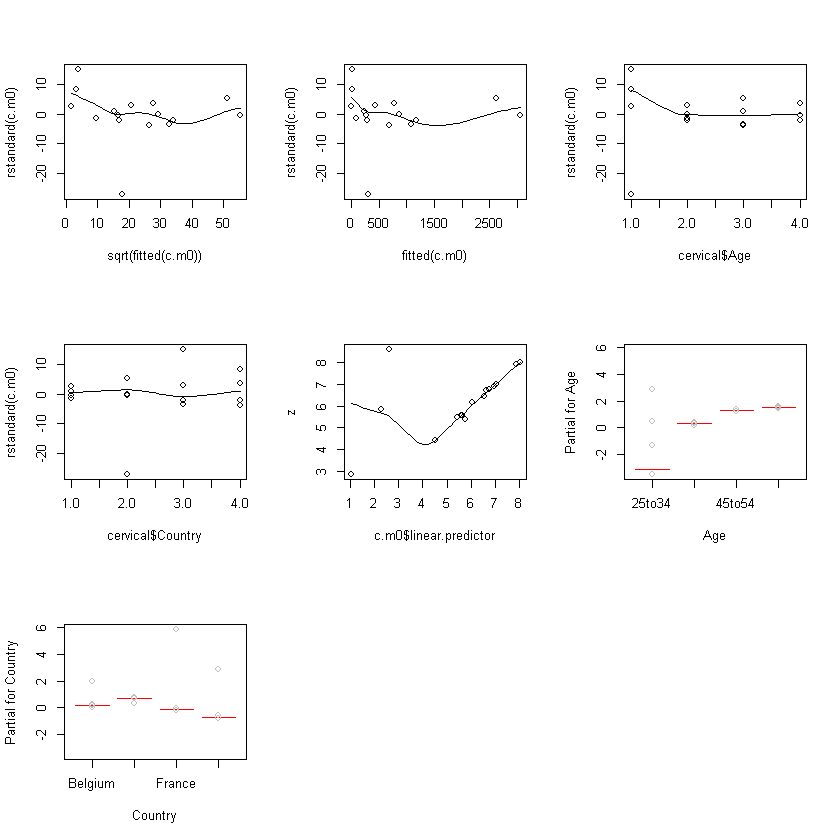

In [21]:
par(mfrow=c(3, 3))
scatter.smooth(rstandard(c.m0) ~ sqrt(fitted(c.m0)))
scatter.smooth(rstandard(c.m0) ~ fitted(c.m0))
scatter.smooth(rstandard(c.m0) ~ cervical$Age)
scatter.smooth(rstandard(c.m0) ~ cervical$Country)
z <- resid(c.m0, type="working") + c.m0$linear.predictor
scatter.smooth(z ~ c.m0$linear.predictor)
termplot(c.m0, partial.resid = TRUE)
shapiro.test(rstandard(c.m0))

In [22]:
deviance(c.m0) / df.residual(c.m0)

[1] 41.82604

In [23]:
c.m1 <- glm( Deaths ~ offset(log(Wyears)) + Age + Country,
data=cervical, family=quasipoisson() )

Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 2"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 2"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1"Warning message in simpleLoess(y, x, w, span, degree = degree, par


	Shapiro-Wilk normality test

data:  rstandard(c.m1)
W = 0.79424, p-value = 0.002286


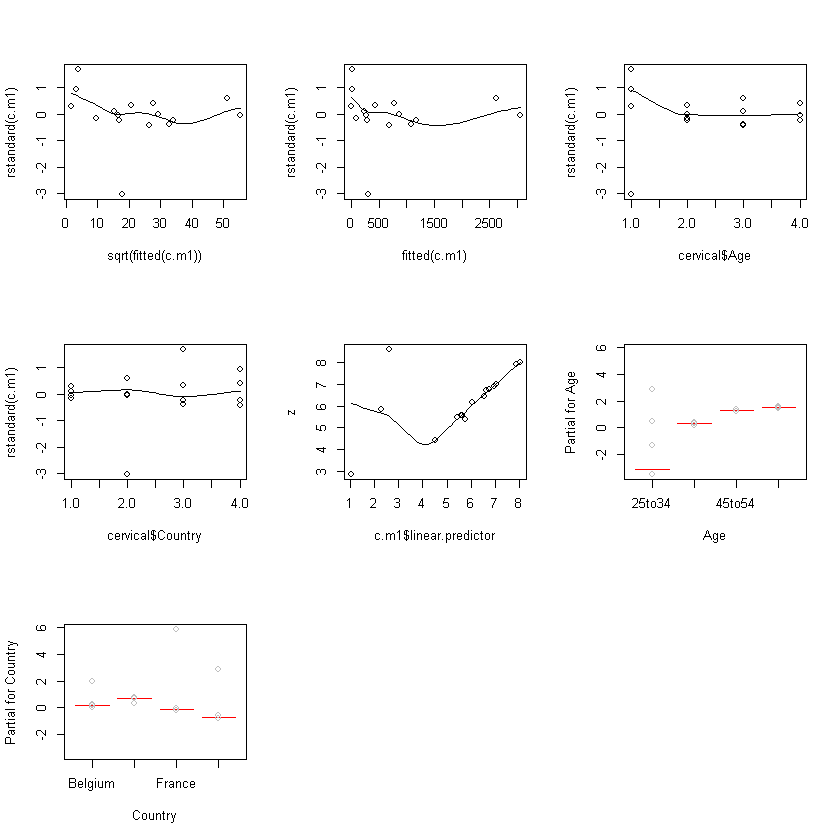

In [24]:
par(mfrow=c(3, 3))
scatter.smooth(rstandard(c.m1) ~ sqrt(fitted(c.m1)))
scatter.smooth(rstandard(c.m1) ~ fitted(c.m1))
scatter.smooth(rstandard(c.m1) ~ cervical$Age)
scatter.smooth(rstandard(c.m1) ~ cervical$Country)
z <- resid(c.m1, type="working") + c.m1$linear.predictor
scatter.smooth(z ~ c.m1$linear.predictor)
termplot(c.m1, partial.resid = TRUE)
shapiro.test(rstandard(c.m1))

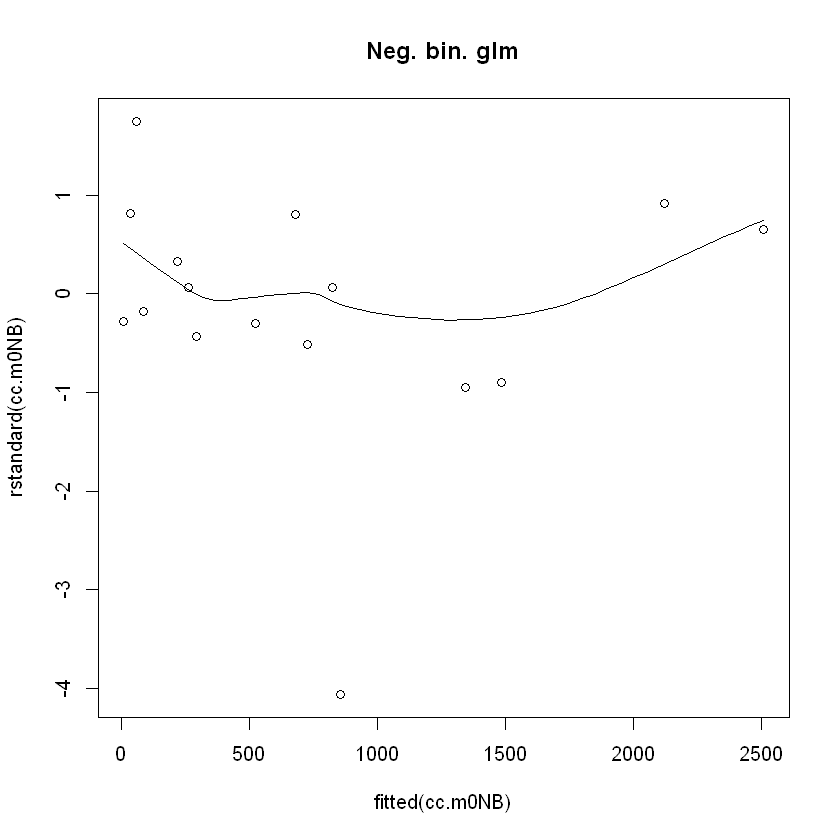

In [26]:
cc.m0NB <- glm.nb( Deaths ~ offset(log(Wyears)) + Age + Country,
data=cervical)
cc.m0NB <- glm.convert(cc.m0NB)
scatter.smooth( rstandard(cc.m0NB) ~ fitted(cc.m0NB), main="Neg. bin. glm" )

In [30]:
gof.dev <- deviance(cc.m0NB)
pchisq(gof.dev, df=df.residual(cc.m0NB), lower.tail = FALSE)
gof.pearson <- sum(cc.m0NB$weights * cc.m0NB$residuals^2)
pchisq(gof.pearson, df=df.residual(cc.m0NB), lower.tail = FALSE)

[1] 0.06920052

[1] 0.2931316

In [32]:
coef(summary(cc.m0NB))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-5.54376313,0.3037823,-18.2491287,2.033793e-08
Age35to44,2.14909425,0.3031040,7.0902858,5.727409e-05
Age45to54,3.20781639,0.3018672,10.6265802,2.152862e-06
Age55to64,3.39570071,0.3017529,11.2532487,1.328398e-06
CountryEngWales,0.35135569,0.2977225,1.1801450,2.681936e-01
CountryFrance,-0.03793594,0.2993700,-0.1267192,9.019485e-01
CountryItaly,-0.77087520,0.3007256,-2.5633837,3.051725e-02


In [33]:
summary(cc.m0NB)$dispersion

[1] 1.194605

In [34]:
anova(cc.m0NB, test="F")

,Df,Deviance,Resid. Df,Resid. Dev,F,Pr(>F)
NULL,NA,NA,15,173.11424,NA,NA
Age,3,140.73115,12,32.38308,39.268530,1.697267e-05
Country,3,16.49243,9,15.89065,4.601921,3.240385e-02


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 2"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"pseudoinverse used at 2"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"neighborhood radius 1"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"reciprocal condition number  0"Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = FALSE, :
"There are other near singularities as well. 1"Warning message in simpleLoess(y, x, w, span, degree = degree, par


	Shapiro-Wilk normality test

data:  rstandard(cc.m0NB)
W = 0.8273, p-value = 0.006427


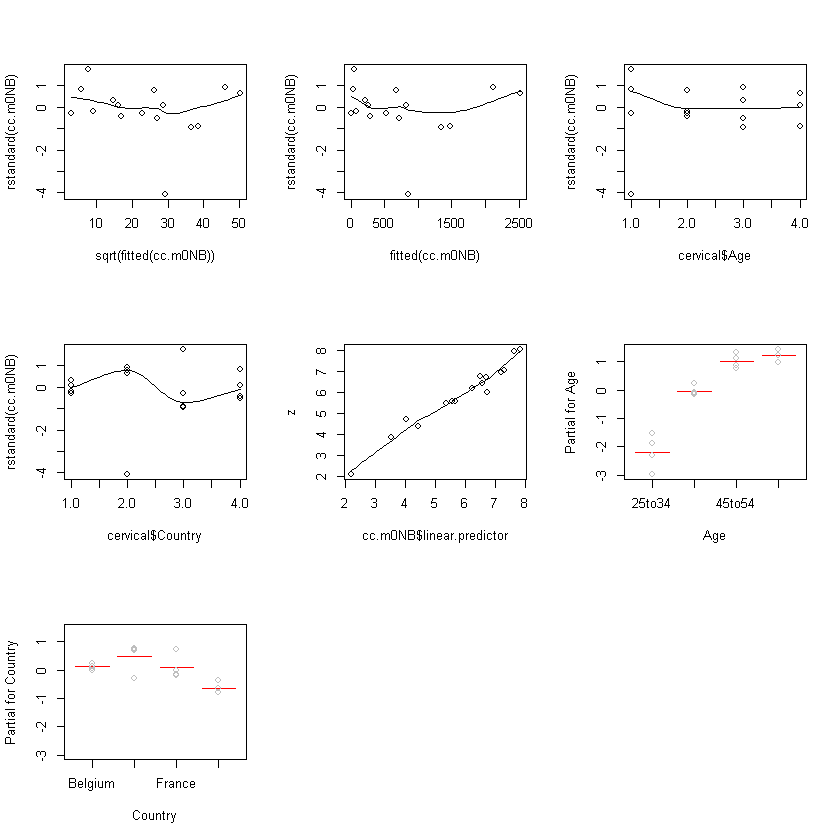

In [35]:
par(mfrow=c(3, 3))
scatter.smooth(rstandard(cc.m0NB) ~ sqrt(fitted(cc.m0NB)))
scatter.smooth(rstandard(cc.m0NB) ~ fitted(cc.m0NB))
scatter.smooth(rstandard(cc.m0NB) ~ cervical$Age)
scatter.smooth(rstandard(cc.m0NB) ~ cervical$Country)
z <- resid(cc.m0NB, type="working") + cc.m0NB$linear.predictor
scatter.smooth(z ~ cc.m0NB$linear.predictor)
termplot(cc.m0NB, partial.resid = TRUE)
shapiro.test(rstandard(cc.m0NB))